<a href="https://colab.research.google.com/github/jnprogrammer/MachineLearning/blob/master/Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install Tensorflow
#!pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x #works only in colab
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x #works only in colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
# this URL doesn't work with pd.read_csv
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-02-11 15:04:25--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-02-11 15:05:35 (16.0 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
!head spam.csv

UnicodeDecodeError: ignored

In [0]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [7]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
#drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# rename columns to something better
df.columns = ['labels', 'data']

In [12]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [0]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [17]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7236 unique tokens.


In [21]:
# pad sequences so that we get a N x T matrix
data_test = pad_sequences(sequences_train)
print('Shape of data train tensor', data_test.shape)

T = data_train.shape[1]

Shape of data train tensor (3733, 162)


In [22]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 162)


In [0]:
# create the model

# We get to choose embedding dimensionality here 
D = 20

# HIdden state dimensionality
M = 15

# Note: We actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then is actually must have size V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)



In [27]:
# Compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

print('Training model . . .')
r = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Training model . . .
Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 10s 3ms/sample - loss: 0.4647 - accuracy: 0.8628 - val_loss: 0.3800 - val_accuracy: 0.8722
Epoch 2/10
3733/3733 [==============================] - 8s 2ms/sample - loss: 0.3893 - accuracy: 0.8628 - val_loss: 0.3618 - val_accuracy: 0.8722
Epoch 3/10
3733/3733 [==============================] - 8s 2ms/sample - loss: 0.3336 - accuracy: 0.8628 - val_loss: 0.2671 - val_accuracy: 0.8722
Epoch 4/10
3733/3733 [==============================] - 8s 2ms/sample - loss: 0.2077 - accuracy: 0.9025 - val_loss: 0.1791 - val_accuracy: 0.9554
Epoch 5/10
3733/3733 [==============================] - 8s 2ms/sample - loss: 0.1318 - accuracy: 0.9829 - val_loss: 0.1449 - val_accuracy: 0.9685
Epoch 6/10
3733/3733 [==============================] - 8s 2ms/sample - loss: 0.0936 - accuracy: 0.9893 - val_loss: 0.1324 - val_accuracy: 0.9685
Epoch 7/10
3733/3733 [==============================] 

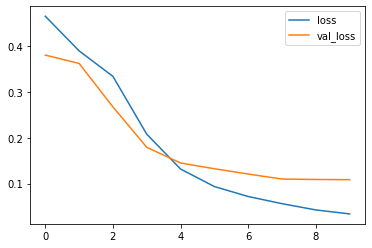

In [28]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

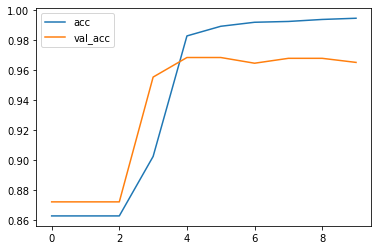

In [29]:
# plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()